# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)


### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [74]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import datetime as dt
# PCA
from sklearn.decomposition import PCA

In [75]:
# Loading the Dataset
# Dataset url = 
#


# Load the dataset
df1 = pd.read_csv('fifa_ranking.csv')
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [76]:

# Load the dataset
df2 = pd.read_csv('results.csv')
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [77]:
df1.shape , df2.shape

((57793, 16), (40839, 9))

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [79]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## 3. Checking the Data

In [80]:
# Determining the no. of records in our dataset
#
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [81]:
# Previewing the top of our dataset
#
df1.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [82]:
df2.head

<bound method NDFrame.head of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [83]:
# Previewing the bottom of our dataset
# 
df1.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [84]:
df2.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [85]:
# Checking whether each column has an appropriate datatype
#
df1.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [86]:
df2.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [87]:
df1.isna().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [88]:
df2.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [89]:
df1.duplicated().sum()

37

In [90]:
df2.duplicated().sum()

0

In [91]:
# We have to merge the 2 datasets. from the Polynomial assessement requirements, the model should check for
# Home team Rank, Away team and Tournament type to Predict:
# 1. how many goals the home team scores.
# 2. how many goals the away team scores.
# We therefore need the Rank column from the Rankings dataset to merge onto the results dataset

Rankings = df1.drop(columns=['country_abrv', 'total_points', 'previous_points', 'rank_change',
                                       'cur_year_avg','cur_year_avg_weighted', 'last_year_avg',	'last_year_avg_weighted',
                                       'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',
                                       'confederation'])
Rankings

,rank,country_full,rank_date
0,1,Germany,1993-08-08
1,2,Italy,1993-08-08
2,3,Switzerland,1993-08-08
3,4,Sweden,1993-08-08
4,5,Argentina,1993-08-08
...,...,...,...
57788,206,Anguilla,2018-06-07
57789,206,Bahamas,2018-06-07
57790,206,Eritrea,2018-06-07
57791,206,Somalia,2018-06-07


In [92]:
import datetime

# Converting Object type dates to datetime format for ease of manipulation

Rankings.rank_date = pd.to_datetime(Rankings.rank_date)

# Getting the Year of the rankings and seeing the last year of rankings available is 2018
Rankings['year'] = Rankings['rank_date'].dt.year
Rankings.tail(10)

,rank,country_full,rank_date,year
57783,202,Cayman Islands,2018-06-07,2018
57784,203,San Marino,2018-06-07,2018
57785,204,British Virgin Islands,2018-06-07,2018
57786,204,Montserrat,2018-06-07,2018
57787,206,Turks and Caicos Islands,2018-06-07,2018
57788,206,Anguilla,2018-06-07,2018
57789,206,Bahamas,2018-06-07,2018
57790,206,Eritrea,2018-06-07,2018
57791,206,Somalia,2018-06-07,2018
57792,206,Tonga,2018-06-07,2018


In [93]:
# Converting Object type dates to datetime format for ease of manipulation

df2.date = pd.to_datetime(df2.date)

# Getting the Year of the rankings and seeing the last year of rankings available is 2019
df2['year'] = df2['date'].dt.year
df2.tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,Ahmedabad,India,False,2019
40830,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019
40831,2019-07-18,Papua New Guinea,Tonga,8,0,Pacific Games,Apia,Samoa,True,2019
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False,2019
40833,2019-07-18,New Caledonia,Tuvalu,11,0,Pacific Games,Apia,Samoa,True,2019
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,2019
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,2019
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,2019
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,2019
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True,2019


In [94]:
# Since we want to work with rankings data as well, and we don't have rankings for 2019, we will drop data from 2019.
df2_target = df2[df2.year < 2019]
df2_target.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
40346,2018-12-30,Yemen,Syria,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40347,2018-12-31,South Korea,Saudi Arabia,0,0,Friendly,Abu Dhabi,United Arab Emirates,True,2018
40348,2018-12-31,Kyrgyzstan,Palestine,2,1,Friendly,Doha,Qatar,True,2018
40349,2018-12-31,Philippines,Vietnam,2,4,Friendly,Doha,Qatar,True,2018
40350,2018-12-31,Qatar,Iran,1,2,Friendly,Doha,Qatar,False,2018


In [95]:
# Also, according to Fifa, ranking depends on results from the previous 4 years, therefore, since our data's latest
# year of ranking is 2018, we'll focus on data from 2015

df2_target = df2_target[df2_target.year > 2014]
df2_target.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
36609,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015
36610,2015-01-04,Iran,Iraq,1,0,Friendly,Wollongong,Australia,True,2015
36611,2015-01-04,South Korea,Saudi Arabia,2,0,Friendly,Parramatta,Australia,True,2015
36612,2015-01-04,South Africa,Zambia,1,0,Friendly,Johannesburg,South Africa,False,2015
36613,2015-01-05,China PR,Oman,4,1,Friendly,Penrith,Australia,True,2015
36614,2015-01-07,Cameroon,DR Congo,1,1,Friendly,Yaoundé,Cameroon,False,2015
36615,2015-01-09,Australia,Kuwait,4,1,AFC Asian Cup,Melbourne,Australia,False,2015
36616,2015-01-09,Senegal,Gabon,1,0,Friendly,Casablanca,Morocco,True,2015
36617,2015-01-10,Burkina Faso,Eswatini,5,1,Friendly,Nelspruit,South Africa,True,2015
36618,2015-01-10,Cameroon,South Africa,1,1,Friendly,Libreville,Gabon,True,2015


In [96]:
# Merging the 2 datasets to get ranking data for home team

results_merged = df2_target.merge(Rankings, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')
results_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank,country_full,rank_date
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,103,Bahrain,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,104,Bahrain,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,108,Bahrain,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,108,Bahrain,2015-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34307,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,153,South Sudan,2018-02-15
34308,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,154,South Sudan,2018-03-15
34309,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,155,South Sudan,2018-04-12
34310,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,Juba,South Sudan,False,2018,157,South Sudan,2018-05-17


In [97]:
results_merged = results_merged.merge(Rankings, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')
results_merged

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,93,Jordan,2015-01-08
1,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,97,Jordan,2015-02-12
2,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,101,Jordan,2015-03-12
3,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-04-09
4,2015-01-04,Bahrain,Jordan,1,0,Friendly,Ballarat,Australia,True,2015,110,Bahrain,2015-01-08,103,Jordan,2015-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347875,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,163,Gambia,2018-02-15
347876,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,164,Gambia,2018-03-15
347877,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,175,Gambia,2018-04-12
347878,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,Lomé,Togo,False,2018,125,Togo,2018-06-07,175,Gambia,2018-05-17


In [98]:
# Let's drop unneccesary columns and remove the anomalies of different dates and rankings repeating themselves on the same match.

results_merged = results_merged.drop(columns=['city', 'country', 'neutral', 'year', 'country_full_x', 'country_full_y'])

results_merged = results_merged[results_merged.rank_date_x == results_merged.rank_date_y]
results_merged

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
13,2015-01-04,Bahrain,Jordan,1,0,Friendly,103,2015-02-12,97,2015-02-12
26,2015-01-04,Bahrain,Jordan,1,0,Friendly,104,2015-03-12,101,2015-03-12
39,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-04-09,103,2015-04-09
52,2015-01-04,Bahrain,Jordan,1,0,Friendly,108,2015-05-07,103,2015-05-07
...,...,...,...,...,...,...,...,...,...,...
347851,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-02-15,163,2018-02-15
347858,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-03-15,164,2018-03-15
347865,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,129,2018-04-12,175,2018-04-12
347872,2018-10-12,Togo,Gambia,1,1,African Cup of Nations qualification,128,2018-05-17,175,2018-05-17


In [99]:
results_merged.duplicated(subset=['date','home_team','away_team','home_score','away_score','tournament']).sum()

28124

In [100]:
# The above shows that the same match has different rankings duplicated on it. To get rid of this, we'll keep the 
# first row of data of each match only, as this is the one that corresponds to the true rankings of the teams, as the
# succeeding rankings are iterations of the away team rankings over the home team rankings.

results_merged.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)
results_merged

,date,home_team,away_team,home_score,away_score,tournament,rank_x,rank_date_x,rank_y,rank_date_y
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,2015-01-08,93,2015-01-08
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,2015-01-08,93,2015-01-08
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,2015-01-08,93,2015-01-08
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,2015-01-08,93,2015-01-08
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,2015-01-08,93,2015-01-08
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,2018-01-18,143,2018-01-18
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,2018-01-18,143,2018-01-18
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,2018-01-18,143,2018-01-18
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,2018-01-18,153,2018-01-18


In [101]:
# we can now drop the remaining unrequired data and rename the columns
results_merged = results_merged.drop(columns=['rank_date_x', 'rank_date_y'])

results_merged.rename(columns={'rank_x':'home_team_rank', 'rank_y':'away_team_rank'},inplace=True)
results_merged

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93
...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153


In [102]:
# We now have to change the tournament type to binary numbers.

results_merged.tournament.unique()

array(['Friendly', 'AFC Asian Cup', 'FIFA World Cup qualification',
       'Copa América', 'African Nations Championship',
       'African Cup of Nations', 'African Cup of Nations qualification',
       'COSAFA Cup', 'CECAFA Cup', 'Gold Cup', 'EAFF Championship',
       'SAFF Cup', 'UEFA Euro qualification', 'ABCS Tournament',
       'Windward Islands Tournament', 'Oceania Nations Cup qualification',
       'AFC Asian Cup qualification', 'AFC Challenge Cup',
       'AFF Championship', 'CFU Caribbean Cup qualification',
       'Baltic Cup', 'UEFA Euro', 'Kirin Cup',
       'Copa América qualification', "King's Cup", 'Oceania Nations Cup',
       'Confederations Cup', 'UNCAF Cup', 'CFU Caribbean Cup',
       'FIFA World Cup', 'UEFA Nations League', 'Intercontinental Cup'],
      dtype=object)

In [103]:
results_merged.tournament.nunique()

32

In [104]:
# According to Fifa, there are 5 categories of games i.e. Friendlies, Regional Competitions,
# Confederations Cup (Pre-cursor to the World Cup), World Cup Qualifiers and The World Cup itself.
# We'll therefore reduce our data to these 5 categories.

def Tourna(Match):
  if Match == Match == 'FIFA World Cup':
    return 5
  elif Match == 'FIFA World Cup qualification':
    return 4
  elif Match == 'Confederations Cup':
    return 3
  elif Match == 'Friendly':
    return 1
  else:
    return 2

# Applying the above function 

results_merged['competition'] = results_merged['tournament'].apply(lambda x: Tourna(x))
results_merged['competition'].unique()

array([1, 2, 4, 3, 5])

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

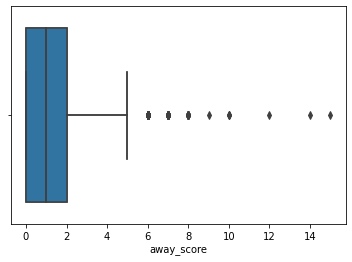

In [105]:
# Checking for Outliers
#
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(results_merged.home_score)
sns.boxplot(results_merged.away_score)
plt.show()

plt.show()

In [106]:
# Checking for Anomalies
#

#Checking for annomalies

def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='home_score', threshold=1.1):
    
    data = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    data['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return data
  
iqr_df = iqr_anomaly_detector(results_merged)

Lower threshold: -2.2, 
Upper threshold: 4.2



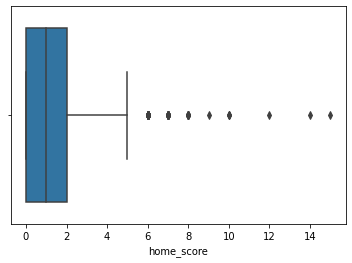

In [107]:
sns.boxplot(results_merged.home_score)
plt.show()

In [108]:
# Checking for Anomalies
#

#Checking for annomalies

def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='away_score', threshold=1.1):
    
    data = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    data['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return data
  
iqr_df = iqr_anomaly_detector(results_merged)

Lower threshold: -2.2, 
Upper threshold: 4.2



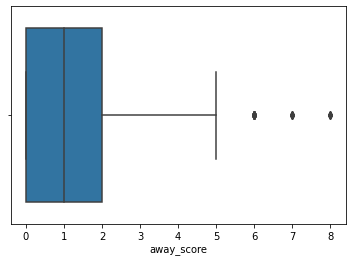

In [109]:
sns.boxplot(results_merged.away_score)
plt.show()

In [110]:
# Identifying the Missing Data
#
results_merged.isna().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
home_team_rank    0
away_team_rank    0
competition       0
dtype: int64

In [111]:
# Dealing with the Missing Data
#

In [112]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

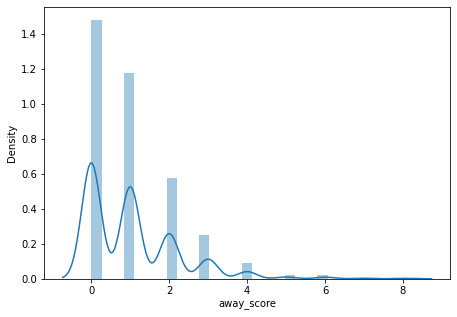

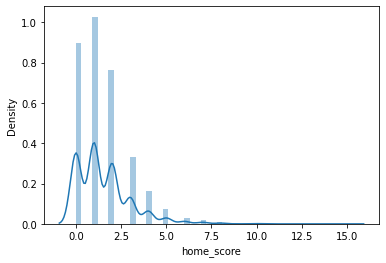

In [113]:
# Ploting the univariate summaries and recording our observations
#

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
sns.distplot(results_merged['away_score'])
plt.show()
sns.distplot(results_merged['home_score'])
plt.show()


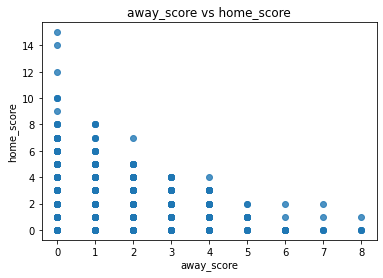

In [114]:

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = results_merged["away_score"], y = results_merged["home_score"], fit_reg=False)

# Giving our scatterplot a title
plt.title('away_score vs home_score')

# Labelling our x axis
plt.xlabel('away_score')

# Labelling our y axis
plt.ylabel('home_score')

# We then display our scatterplot as shown below
plt.show()


In [115]:
#Exporting the clean dataset:
results_merged.to_csv('FIFA.csv')

## 7. Implementing the Solution

**Polynomial Regression**

**Model 1: Detecting multicollinearity**

In [116]:
# Implementing the Solution
import numpy as np
import pandas as pd


In [117]:
results_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4


In [118]:

# Model 1: Predict how many goals the home team scores. dependent variable here is home_score

independent_home_goals = results_merged.drop(columns=['date', 'home_team', 'away_team', 'home_score', 'tournament'])
correlations_home_goals = independent_home_goals.corr()
correlations_home_goals



,away_score,home_team_rank,away_team_rank,competition
away_score,1.000000,0.196961,-0.170409,0.045194
home_team_rank,0.196961,1.000000,0.535766,-0.071270
away_team_rank,-0.170409,0.535766,1.000000,-0.095467
competition,0.045194,-0.071270,-0.095467,1.000000


In [119]:
# Let's use these correlations to compute the VIF score for each variable.
pd.DataFrame(np.linalg.inv(correlations_home_goals.values), index = correlations_home_goals.index, 
             columns=correlations_home_goals.columns)

,away_score,home_team_rank,away_team_rank,competition
away_score,1.172299,-0.475220,0.450189,-0.043872
home_team_rank,-0.475220,1.596059,-0.931677,0.046284
away_team_rank,0.450189,-0.931677,1.582014,0.064284
competition,-0.043872,0.046284,0.064284,1.011418


The tabe above shows us how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Let's use these correlations to compute the VIF score for each variable

In [120]:
results_merged.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4


In [121]:
results_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2942 entries, 0 to 347844
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2942 non-null   datetime64[ns]
 1   home_team       2942 non-null   object        
 2   away_team       2942 non-null   object        
 3   home_score      2942 non-null   int64         
 4   away_score      2942 non-null   int64         
 5   tournament      2942 non-null   object        
 6   home_team_rank  2942 non-null   int64         
 7   away_team_rank  2942 non-null   int64         
 8   competition     2942 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 229.8+ KB


Model 1: Building the Model

In [122]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = independent_home_goals.values
y = results_merged['home_score'].values

# Split the dataset into train and test sets
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

y_pred = pol_reg.predict(poly_reg.fit_transform(X_test))

In [123]:
# let's check with 3 degrees of freedom

poly_reg_3 = PolynomialFeatures(degree = 3) 
X_poly_3 = poly_reg_3.fit_transform(X)

pol_3_reg = LinearRegression()
pol_3_reg.fit(X_poly_3, y)

y_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(X_test))

In [124]:
# Now let's try with 4 degrees of freedom

poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly_4 = poly_reg_4.fit_transform(X)

pol_4_reg = LinearRegression()
pol_4_reg.fit(X_poly_4, y)

y_pred_4 = pol_4_reg.predict(poly_reg_4.fit_transform(X_test))

In [152]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_3)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_4)))

# Since we have 4 features, we can use 4 degrees of freedom to avoid over or underfitting the model,
# since it has the lowest RMSE.

Root Mean Squared Error: 1.3972937526881384
Root Mean Squared Error: 1.3749325221645692
Root Mean Squared Error: 1.3606882100438071


**Model 1: Cross Validating the Model**

In [153]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  Xc_train, Xc_test = X[train_index], X[test_index]
  yc_train, yc_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(Xc_train, yc_train)
  
  # assess the accuraccy of the model
  yc_pred = regressor.predict(Xc_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(yc_test, yc_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

# The means of the RMSEs are within the range of those we found in the Polynomial Regression Model we built.

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4381986573408163

Training model 2
Model 2 Root Mean Squared Error: 1.3784592138973437

Training model 3
Model 3 Root Mean Squared Error: 1.2871880202470884

Training model 4
Model 4 Root Mean Squared Error: 1.4725249581701463

Training model 5
Model 5 Root Mean Squared Error: 1.3184329306184097


In [154]:

np.mean(RMSES)


1.3789607560547608

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 3 instead, as it has the least RMSE, and is closest to our polynomial regression model with a degree of freedom of 4.

**Model 1: Residual Plots and heteroscedasticity using Bartlett’s test**

In [129]:
residuals_home_score = np.subtract(y_pred_4, y_test)

pd.DataFrame(residuals_home_score).describe()

,0
count,589.000000
mean,-0.052173
std,1.360843
min,-9.886287
25%,-0.725743
50%,0.109383
75%,0.828980
max,3.343042


In [130]:
# Let's be thorough though, and perform a heteroskedasticity test.
# For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,
# and the new hypothesis that the variance is different for at least one pair of datapoints.

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_4, residuals_home_score)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Model 1 has proven sufficient for predicting the home team goals and after cross validation and checking the residuals, whose variances are homogenous, we can be comfortable with our results.

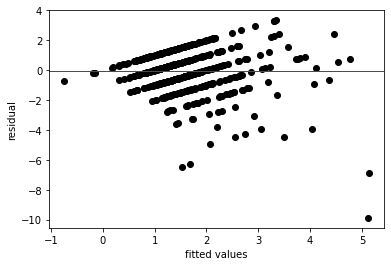

In [131]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_4, residuals_home_score, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals_home_score.mean(), color='red', linewidth=1)
plt.show()

# The residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. 
# This shows that the model is fairly good

**Model 2 : Detecting Multicolinearity**




In [132]:
# Model 2: Predict how many goals the home team scores. dependent variable here is away_score

independent_away_goals = results_merged.drop(columns=['date', 'home_team', 'away_team', 'away_score', 'tournament'])
correlations_away_goals = independent_away_goals.corr()
correlations_away_goals


,home_score,home_team_rank,away_team_rank,competition
home_score,1.000000,-0.135260,0.256419,0.038530
home_team_rank,-0.135260,1.000000,0.535766,-0.071270
away_team_rank,0.256419,0.535766,1.000000,-0.095467
competition,0.038530,-0.071270,-0.095467,1.000000


In [133]:
# Let's use these correlations to compute the VIF score for each variable.
pd.DataFrame(np.linalg.inv(correlations_away_goals.values), index = correlations_away_goals.index, 
             columns=correlations_away_goals.columns)

,home_score,home_team_rank,away_team_rank,competition
home_score,1.209337,0.460555,-0.563296,-0.067548
home_team_rank,0.460555,1.578812,-0.963704,0.002775
away_team_rank,-0.563296,-0.963704,1.671509,0.112595
competition,-0.067548,0.002775,0.112595,1.013549


The VIF scores of all columns are also way below 5, indicating we have minimal multicolinearity in the data.

**Model 2: Building the Model**

In [134]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

A = independent_away_goals.values
b = results_merged['away_score'].values

# Split the dataset into train and test sets
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
A_poly = poly_reg.fit_transform(A)

pol_reg = LinearRegression()
pol_reg.fit(A_poly, b)

b_pred = pol_reg.predict(poly_reg.fit_transform(A_test))

In [135]:
poly_reg_3 = PolynomialFeatures(degree = 3) 
A_poly_3 = poly_reg_3.fit_transform(A)

pol_3_reg = LinearRegression()
pol_3_reg.fit(A_poly_3, b)

b_pred_3 = pol_3_reg.predict(poly_reg_3.fit_transform(A_test))
poly_reg_4 = PolynomialFeatures(degree = 4) 
A_poly_4 = poly_reg_4.fit_transform(A)

pol_4_reg = LinearRegression()
pol_4_reg.fit(A_poly_4, b)

b_pred_4 = pol_4_reg.predict(poly_reg_4.fit_transform(A_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_3)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, b_pred_4)))

# Since we have 4 features, we can use 4 degrees of freedom to avoid over or underfitting the model,
# since it has the lowest RMSE.

Root Mean Squared Error: 1.0538279527356949
Root Mean Squared Error: 1.0518691429564835
Root Mean Squared Error: 1.0498697935683117


**Model 2: Cross Validating the Model**

In [136]:
folds = KFold(n_splits=5)
print('we are using ' +str(folds.get_n_splits(A)) + ' folds')

RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(A):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  Ac_train, Ac_test = A[train_index], A[test_index]
  bc_train, bc_test = b[train_index], b[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(Ac_train, bc_train)
  
  # assess the accuraccy of the model
  bc_pred = regressor.predict(Ac_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(bc_test, bc_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

# The means of the RMSEs are within the range of those we found in the Polynomial Regression Model we built.

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 1.1304967622390092

Training model 2
Model 2 Root Mean Squared Error: 1.0372517225982238

Training model 3
Model 3 Root Mean Squared Error: 1.1639530721514593

Training model 4
Model 4 Root Mean Squared Error: 1.1201785808557778

Training model 5
Model 5 Root Mean Squared Error: 1.142821054421277


In [137]:
np.mean(RMSES)

1.1189402384531495

As you can see, the average is fairly close to our initial value. However in this case, it might be worthwile to pick model 2 instead, as it has the least RMSE, and is closest to our polynomial regression model with a degree of freedom of 4.

**Model 2: Residual Plots and heteroscedasticity using Bartlett’s test**

In [138]:
residuals_away_score = np.subtract(b_pred_4, b_test)

pd.DataFrame(residuals_away_score).describe()

,0
count,589.000000
mean,-0.022598
std,1.050519
min,-3.960246
25%,-0.631214
50%,0.072672
75%,0.789596
max,3.231230


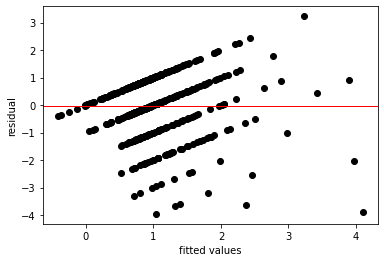

In [139]:
plt.scatter(b_pred_4, residuals_away_score, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals_away_score.mean(), color='red', linewidth=1)
plt.show()

# The residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. 
# This shows that the model is fairly good

In [140]:
# Let's be thorough though, and perform a heteroskedasticity test.
# For this we will use bartlett's test. The test establishes as a null hypothesis that the variance is equal for all our datapoints,
# and the new hypothesis that the variance is different for at least one pair of datapoints.

import scipy as sp

test_result, p_value = sp.stats.bartlett(b_pred_4, residuals_away_score)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(b_pred_4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Model 2 has proven sufficient for predicting the home team goals and after cross validation and checking the residuals, whose variances are homogenous, we can be comfortable with our resu

**LOGISTIC REGRESSION MODEL**

In [ ]:
results_merged.head()


In [141]:
# Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

def match_result(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

results_merged['result'] = results_merged.apply(match_result, axis=1)
results_merged

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1,Win
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1,Win
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2,Win
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2,Lose
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4,Lose
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143,1,Draw
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143,2,Draw
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143,2,Lose
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153,2,Win


In [142]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
results_merged['result'] = labelencoder.fit_transform(results_merged['result'])
results_merged

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank,competition,result
0,2015-01-04,Bahrain,Jordan,1,0,Friendly,110,93,1,2
144,2015-03-30,Saudi Arabia,Jordan,2,1,Friendly,102,93,1,2
288,2015-01-20,Japan,Jordan,2,0,AFC Asian Cup,54,93,2,2
432,2015-01-16,Palestine,Jordan,1,5,AFC Asian Cup,115,93,2,1
576,2015-09-08,Bangladesh,Jordan,0,4,FIFA World Cup qualification,165,93,4,1
...,...,...,...,...,...,...,...,...,...,...
347700,2018-09-02,Ethiopia,Burundi,1,1,Friendly,137,143,1,0
347736,2018-09-08,Gabon,Burundi,1,1,African Cup of Nations qualification,93,143,2,0
347772,2018-11-16,South Sudan,Burundi,2,5,African Cup of Nations qualification,153,143,2,1
347808,2018-10-12,Gabon,South Sudan,3,0,African Cup of Nations qualification,93,153,2,2


In [143]:
C = results_merged.drop(columns= ['date',	'home_team',	'away_team', 'tournament', 'result'])
d = results_merged['result']

from sklearn.model_selection import train_test_split
C_train, C_test, d_train, d_test = train_test_split(C, d, test_size = .2, random_state=20)

from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(C_train, d_train)

d_pred = LogReg.predict(C_test)

# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(d_test, d_pred)
confusion_matrix

array([[136,   0,   0],
       [  0, 167,   0],
       [  0,   0, 286]])

The results from the confusion matrix tell us that 136, 167 and 286 are the number of correct predictions. There seems to be no incorrect predictions.

**Hyperparameter Testing**

In [145]:
# Alternative Solution

# scaling data as advised by the warning after running the previous cell.
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(C_train, d_train)
C_train = scaler.transform(C_train)

# Creating the logistic regression to improve the regression as suggested by the warning
# after running the previous cell.

logistic = linear_model.LogisticRegression()

In [146]:
# Creating regularization penalty space
penalty = ['l1', 'l2']

# Creating regularization hyperparameter space
hyp_C = np.logspace(0, 4, 10)

solver = [ 'liblinear', 'sag', 'saga']

# Creating hyperparameter options
hyperparameters = dict(C=hyp_C, penalty=penalty, solver = solver, max_iter = (10,100))

# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fitting grid search
best_model = clf.fit(C_train, d_train)

In [147]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_model.best_estimator_.get_params()['max_iter'])

Best Penalty: l1
Best C: 1.0
Best Solver: saga
Best max_iter: 10


In [148]:
# Predicting target vector
best_model.predict(C)

array([2, 2, 2, ..., 1, 2, 2])

In [167]:
logistic = linear_model.LogisticRegression(penalty='l1', C=1, max_iter=10, solver='saga').fit(C_train,d_train)

dc_pred = logistic.predict(C_test)
metrics.accuracy_score(d_test, dc_pred)

0.7538200339558574

In [150]:
best_model.best_score_

1.0

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?